In [8]:
#!pip install pandas
#!pip install numpy
#!pip install matplotlib
!pip install sklearn
!pip install seaborn
!pip install ipywidgets widgetsnbextension IProgress pandas_profiling
!pip install catboost

You should consider upgrading via the 'C:\Users\52mar\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\52mar\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\52mar\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\52mar\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\52mar\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\52mar\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\52mar\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [37]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [21]:
data = pd.read_csv('heart.csv')

# Датапонимание
## Форма датасета

In [22]:
print("Форма датасета : ", data.shape)

Форма датасета :  (303, 14)


In [23]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [25]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trtbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalachh'}>],
       [<AxesSubplot:title={'center':'exng'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slp'}>,
        <AxesSubplot:title={'center':'caa'}>],
       [<AxesSubplot:title={'center':'thall'}>,
        <AxesSubplot:title={'center':'output'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

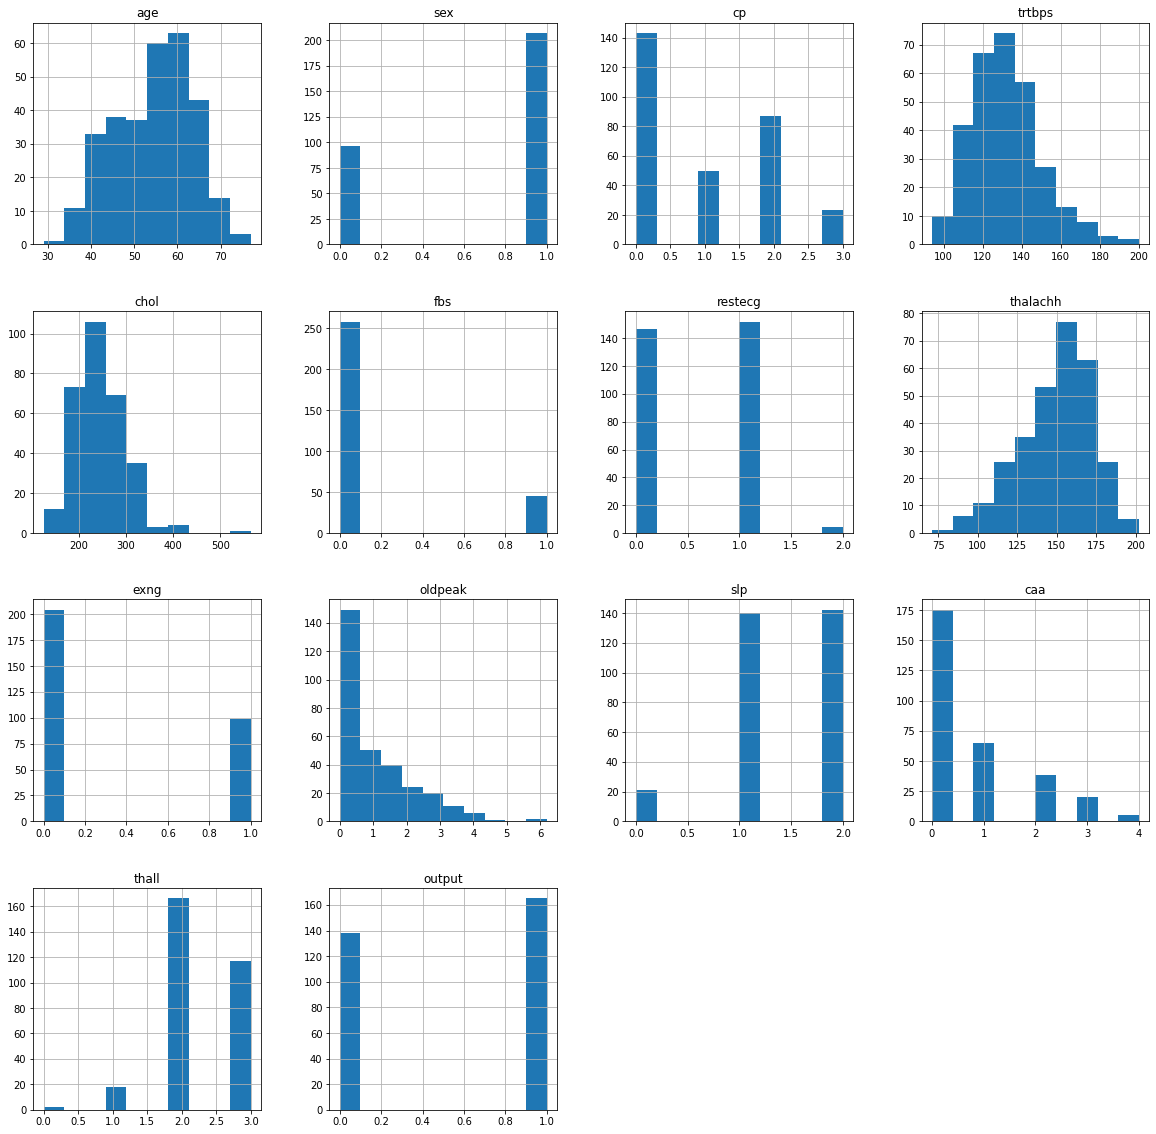

In [26]:
fig, ax = plt.subplots(figsize=(20,20))
data.hist(ax=ax)

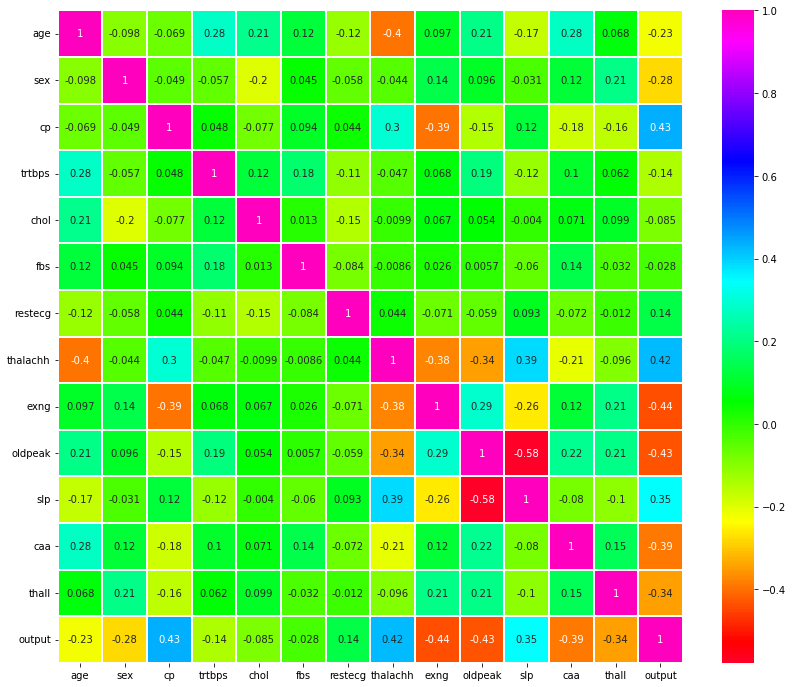

In [27]:
plt.figure(figsize=(14,12))
sns.heatmap(data.corr(),linewidths=.1,cmap="gist_rainbow", annot=True, annot_kws={"size": 10})
plt.yticks(rotation=0);

# Decision Tree


In [28]:
features_num = ["age", "trtbps","chol","thalachh","oldpeak"]

features_cat = ['sex','exng','caa','cp','fbs','restecg','slp','thall']

scaler = StandardScaler()
ohe = OneHotEncoder(sparse = False)

scaled_columns = scaler.fit_transform(data[features_num]) 
encoded_columns = ohe.fit_transform(data[features_cat])

X = np.concatenate([scaled_columns, encoded_columns], axis = 1)
y = data['output']

In [29]:
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [46]:
y_pred_dt = dt.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
roc_dt = roc_auc_score(y_test, y_pred_dt)

In [38]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.79      0.70      0.74        33
           1       0.79      0.86      0.82        43

    accuracy                           0.79        76
   macro avg       0.79      0.78      0.78        76
weighted avg       0.79      0.79      0.79        76



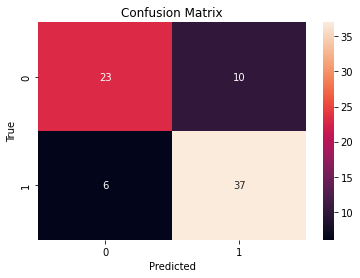

In [39]:
sns.heatmap(confusion_matrix(y_test, y_pred_dt),annot = True, fmt = 'd')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.show()

# KNN

In [43]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [44]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [45]:
y_pred_knn = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
roc_knn = roc_auc_score(y_test, y_pred_knn)

In [46]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.88      0.64      0.74        33
           1       0.77      0.93      0.84        43

    accuracy                           0.80        76
   macro avg       0.82      0.78      0.79        76
weighted avg       0.82      0.80      0.80        76



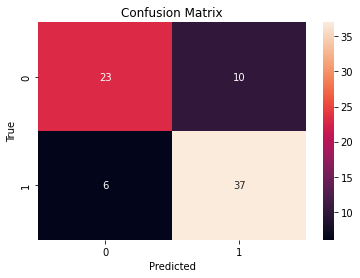

In [47]:
sns.heatmap(confusion_matrix(y_test, y_pred_dt),annot = True, fmt = 'd')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.show()

# Random Forest

In [12]:
rf = RandomForestClassifier()

In [17]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [33]:
y_pred_rf = rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_rf = roc_auc_score(y_test, y_pred_rf)

In [34]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.86      0.76      0.81        33
           1       0.83      0.91      0.87        43

    accuracy                           0.84        76
   macro avg       0.85      0.83      0.84        76
weighted avg       0.84      0.84      0.84        76



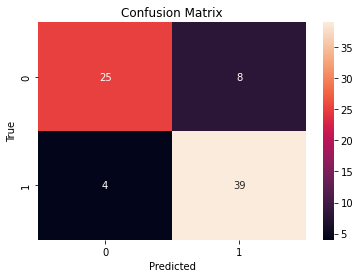

In [36]:
sns.heatmap(confusion_matrix(y_test, y_pred_rf),annot = True, fmt = 'd')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.show()

# Naive Bouyes

In [38]:
gnb = GaussianNB()

In [39]:
gnb.fit(X_train, y_train)

GaussianNB()

In [41]:
y_pred_gnb = gnb.predict(X_test)

accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
recall_gnb = recall_score(y_test, y_pred_gnb)
precision_gnb = precision_score(y_test, y_pred_gnb)
f1_gnb = f1_score(y_test, y_pred_gnb)
roc_gnb = roc_auc_score(y_test, y_pred_gnb)

In [44]:
print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

           0       0.62      0.88      0.73        33
           1       0.86      0.58      0.69        43

    accuracy                           0.71        76
   macro avg       0.74      0.73      0.71        76
weighted avg       0.76      0.71      0.71        76



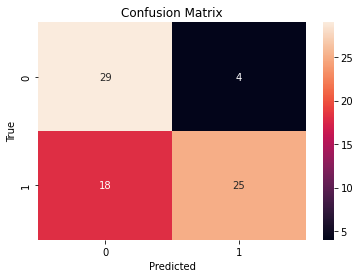

In [45]:
sns.heatmap(confusion_matrix(y_test, y_pred_gnb),annot = True, fmt = 'd')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.show()